In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>The Telecom Retention Challenge: Predicting Customer Churn</h2>
<p>
You are a data scientist working for a major telecom company facing a critical issue:
 customer churn. Despite offering a range of services, including phone, internet, and
 security, customers are leaving at a troubling rate. The company has tasked you with
 developing a model that can predict which customers are at the highest risk of
 churning, so that targeted retention efforts can be made to keep them.
</p>

<p>
 Your dataset contains crucial information about each customer: their demographics,
 the services they use, billing methods, payment history, and, most importantly,
 whether they have already churned. Your job is to analyze these factors and create a
 predictive model that can identify customers likely to leave in the future.
</p>
<p>
 The stakes are high. Reducing churn will not only increase company revenue but
 also enhance customer satisfaction and loyalty. Armed with insights from this
 dataset, you can help the company understand the reasons behind customer
 departures and implement strategies to keep them from leaving.

</p>

 

<h4>READING DATASET</h4>

In [2]:
data=pd.read_csv('customer_churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<h4>PREPROCESSING</h4>

REMOVING DUPLICATES

In [6]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


REMOVING UNWANTED COLUMNS

In [7]:
data.drop('customerID',axis=1,inplace=True)

FILLING MISSING VALUES

In [8]:
nunique_dict={'Column':[],'Nunique_count':[]}
for column in data.columns:
  nunique_dict['Column'].append(column)
  nunique_dict['Nunique_count'].append(data[column].nunique())
  print(f"{column} -> {data[column].nunique()}")

nunique_dataframe=pd.DataFrame(nunique_dict)

gender -> 2
SeniorCitizen -> 2
Partner -> 2
Dependents -> 2
tenure -> 73
PhoneService -> 2
MultipleLines -> 3
InternetService -> 3
OnlineSecurity -> 3
OnlineBackup -> 3
DeviceProtection -> 3
TechSupport -> 3
StreamingTV -> 3
StreamingMovies -> 3
Contract -> 3
PaperlessBilling -> 2
PaymentMethod -> 4
MonthlyCharges -> 1585
TotalCharges -> 6526
Churn -> 2


In [9]:
nunique_dataframe.sort_values(['Nunique_count'],ascending=True)

,Column,Nunique_count
0,gender,2
15,PaperlessBilling,2
5,PhoneService,2
19,Churn,2
2,Partner,2
1,SeniorCitizen,2
3,Dependents,2
6,MultipleLines,3
7,InternetService,3
8,OnlineSecurity,3


In [10]:
data.isna().sum()

gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

In [11]:
#HANDLING MISSING VALUES IN COLUMNS WITH 2 CATEGORICAL VALUES

In [12]:
selected_columns=['SeniorCitizen','PaperlessBilling','PhoneService']

In [13]:
for column in selected_columns:
  print(column)
  print(data[column].unique())

SeniorCitizen
[ 0.  1. nan]
PaperlessBilling
['Yes' 'No' nan]
PhoneService
['No' 'Yes' nan]


In [14]:
for column in selected_columns:
  data[column]=data[column].fillna(data[column].mode()[0])

In [15]:
for column in selected_columns:
  print(column)
  print(data[column].unique())

SeniorCitizen
[0. 1.]
PaperlessBilling
['Yes' 'No']
PhoneService
['No' 'Yes']


In [16]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              13
PhoneService         0
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling     0
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

In [17]:
#HANDLING MISSING VALUES IN COLUMNS WITH 3 & 4 CATEGORICAL VALUES

In [18]:
selected_columns=['Contract','StreamingMovies','StreamingTV','TechSupport','OnlineBackup','OnlineSecurity','InternetService','MultipleLines','DeviceProtection','PaymentMethod']

In [19]:
for column in selected_columns:
  print(column)
  print(data[column].unique())

Contract
['Month-to-month' 'One year' 'Two year' nan]
StreamingMovies
['No' 'Yes' 'No internet service' nan]
StreamingTV
['No' 'Yes' 'No internet service' nan]
TechSupport
['No' 'Yes' 'No internet service' nan]
OnlineBackup
['Yes' 'No' 'No internet service' nan]
OnlineSecurity
['No' 'Yes' 'No internet service' nan]
InternetService
['DSL' 'Fiber optic' 'No' nan]
MultipleLines
['No phone service' 'No' 'Yes' nan]
DeviceProtection
['No' 'Yes' 'No internet service' nan]
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' nan]


In [20]:
for column in selected_columns:
  data[column]=data[column].fillna(data[column].mode()[0])

In [21]:
for column in selected_columns:
  print(column)
  print(data[column].unique())

Contract
['Month-to-month' 'One year' 'Two year']
StreamingMovies
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
OnlineSecurity
['No' 'Yes' 'No internet service']
InternetService
['DSL' 'Fiber optic' 'No']
MultipleLines
['No phone service' 'No' 'Yes']
DeviceProtection
['No' 'Yes' 'No internet service']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              13
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

In [23]:
#HANDLING MISSING VALUES IN COLUMNS WITH NUMERICAL VALUES

In [24]:
#'tenure' column

In [25]:
data['tenure'].value_counts()

tenure
1.0     611
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
28.0     57
39.0     56
44.0     51
36.0     50
0.0      11
Name: count, Length: 73, dtype: int64

(array([1610.,  757.,  569.,  555.,  494.,  494.,  450.,  494.,  500.,
        1107.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

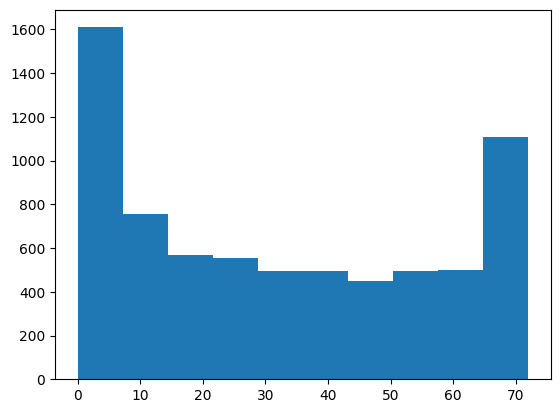

In [26]:
plt.hist(data['tenure'])

In [27]:
data['tenure']=data['tenure'].fillna(data['tenure'].median())

In [28]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

In [29]:
#'MonthlyCharges' column

In [30]:
data['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

(array([1603.,  191.,  364.,  637.,  472.,  892.,  953.,  866.,  755.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

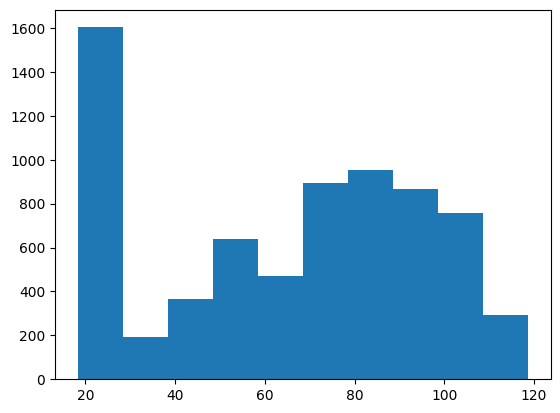

In [31]:
plt.hist(data['MonthlyCharges'])

In [32]:
data['MonthlyCharges']=data['MonthlyCharges'].fillna(data['MonthlyCharges'].median())

In [33]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

In [34]:
#'TotalCharges ' column

In [35]:
data['TotalCharges'].value_counts()

TotalCharges
           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
6565.85     1
2117.2      1
203.95      1
6849.4      1
6844.5      1
Name: count, Length: 6526, dtype: int64

<b>plt.hist(data['TotalCharges']) got error since 'TotalCharges' columnn carries string values,so it is converted to </b>

In [36]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

(array([2707., 1225.,  671.,  508.,  453.,  412.,  395.,  310.,  222.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

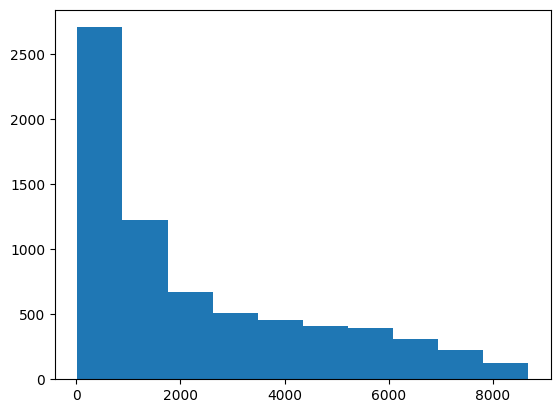

In [37]:
plt.hist(data['TotalCharges'])

In [38]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].median())

In [39]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<b>SINCE DATA HAS A LOT OT CATEGORCIAL VALUES , WE USE ENCODING TO CONVERT THEM</b>

In [41]:
for column in data.columns:
  print(data[column].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0.0    5903
1.0    1140
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1.0     611
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
28.0     57
39.0     56
44.0     51
36.0     50
0.0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6362
No      681
Name: count, dtype: int64
MultipleLines
No                  3395
Yes                 2967
No phone service     681
Name: count, dtype: int64
InternetService
Fiber optic    3118
DSL            2407
No             1518
Name: count, dtype: int64
OnlineSecurity
No                     3507
Yes                    2013
No internet service    1523
Name: count, dtype: int64
OnlineBackup
No                     3098
Yes                    2422
No internet service    1523
Name: count, dtype: int64
DeviceProtection
No                     3105
Yes 

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
#HANDLING COLUMNS WITH CATEGORICAL VALUES "YES" or "NO"

In [44]:
le=LabelEncoder()
le.fit(data['Partner'])

LabelEncoder()

In [45]:
selected_columns=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [46]:
for column in selected_columns:
  data[column]=le.transform(data[column])

In [47]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0.0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0.0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0.0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0.0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [48]:
#HANDLING COLUMNS WITH CATEGORICAL VALUES "MALE" or "FEMALE"

In [49]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])

In [50]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0.0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0.0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0.0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [51]:
for column in data.columns:
  print(data[column].value_counts())

gender
1    3555
0    3488
Name: count, dtype: int64
SeniorCitizen
0.0    5903
1.0    1140
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
tenure
1.0     611
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
28.0     57
39.0     56
44.0     51
36.0     50
0.0      11
Name: count, Length: 73, dtype: int64
PhoneService
1    6362
0     681
Name: count, dtype: int64
MultipleLines
No                  3395
Yes                 2967
No phone service     681
Name: count, dtype: int64
InternetService
Fiber optic    3118
DSL            2407
No             1518
Name: count, dtype: int64
OnlineSecurity
No                     3507
Yes                    2013
No internet service    1523
Name: count, dtype: int64
OnlineBackup
No                     3098
Yes                    2422
No internet service    1523
Name: count, dtype: int64
DeviceProtection
No                     3105
Yes                    241

In [52]:
#HANDLING COLUMNS WITH CATEGORICAL VALUES "No","Yes","No internet service"

In [53]:
selected_columns=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [54]:
for column in selected_columns:
  data[column]=data[column].map({'No':0,'Yes':1,'No internet service':2})

In [55]:
for column in data.columns:
  print(data[column].value_counts())

gender
1    3555
0    3488
Name: count, dtype: int64
SeniorCitizen
0.0    5903
1.0    1140
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
tenure
1.0     611
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
28.0     57
39.0     56
44.0     51
36.0     50
0.0      11
Name: count, Length: 73, dtype: int64
PhoneService
1    6362
0     681
Name: count, dtype: int64
MultipleLines
No                  3395
Yes                 2967
No phone service     681
Name: count, dtype: int64
InternetService
Fiber optic    3118
DSL            2407
No             1518
Name: count, dtype: int64
OnlineSecurity
0    3507
1    2013
2    1523
Name: count, dtype: int64
OnlineBackup
0    3098
1    2422
2    1523
Name: count, dtype: int64
DeviceProtection
0    3105
1    2415
2    1523
Name: count, dtype: int64
TechSupport
0    3481
1    2039
2    1523
Name: count, dtype: int64
StreamingTV
0    2824
1    2699
2    1

In [56]:
#HANDLING COLUMNS WITH OTHER CATEGORICAL VALUES

In [57]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3395
Yes                 2967
No phone service     681
Name: count, dtype: int64

In [58]:
data['MultipleLines']=data['MultipleLines'].map({'No':0,'Yes':1,'No phone service':2})

In [59]:
data['MultipleLines'].value_counts()

MultipleLines
0    3395
1    2967
2     681
Name: count, dtype: int64

In [60]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3118
DSL            2407
No             1518
Name: count, dtype: int64

In [61]:
data['InternetService']=data['InternetService'].map({'No':0,'Fiber optic':1,'DSL':2})

In [62]:
data['InternetService'].value_counts()

InternetService
1    3118
2    2407
0    1518
Name: count, dtype: int64

In [63]:
data['Contract'].value_counts()

Contract
Month-to-month    3885
Two year          1692
One year          1466
Name: count, dtype: int64

In [64]:
data['Contract']=data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})

In [65]:
data['Contract'].value_counts()

Contract
0    3885
2    1692
1    1466
Name: count, dtype: int64

In [66]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2366
Mailed check                 1611
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [67]:
data['PaymentMethod']=data['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [68]:
data['PaymentMethod'].value_counts()

PaymentMethod
0    2366
1    1611
2    1544
3    1522
Name: count, dtype: int64

In [69]:
for column in data.columns:
  print(data[column].value_counts())

gender
1    3555
0    3488
Name: count, dtype: int64
SeniorCitizen
0.0    5903
1.0    1140
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
tenure
1.0     611
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
28.0     57
39.0     56
44.0     51
36.0     50
0.0      11
Name: count, Length: 73, dtype: int64
PhoneService
1    6362
0     681
Name: count, dtype: int64
MultipleLines
0    3395
1    2967
2     681
Name: count, dtype: int64
InternetService
1    3118
2    2407
0    1518
Name: count, dtype: int64
OnlineSecurity
0    3507
1    2013
2    1523
Name: count, dtype: int64
OnlineBackup
0    3098
1    2422
2    1523
Name: count, dtype: int64
DeviceProtection
0    3105
1    2415
2    1523
Name: count, dtype: int64
TechSupport
0    3481
1    2039
2    1523
Name: count, dtype: int64
StreamingTV
0    2824
1    2699
2    1520
Name: count, dtype: int64
StreamingMovies
0    2794
1    2726
2    1523

In [70]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0.0,0,0,45.0,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


<h4>EDA</h4>

BOXPLOT FOR OUTLIERS

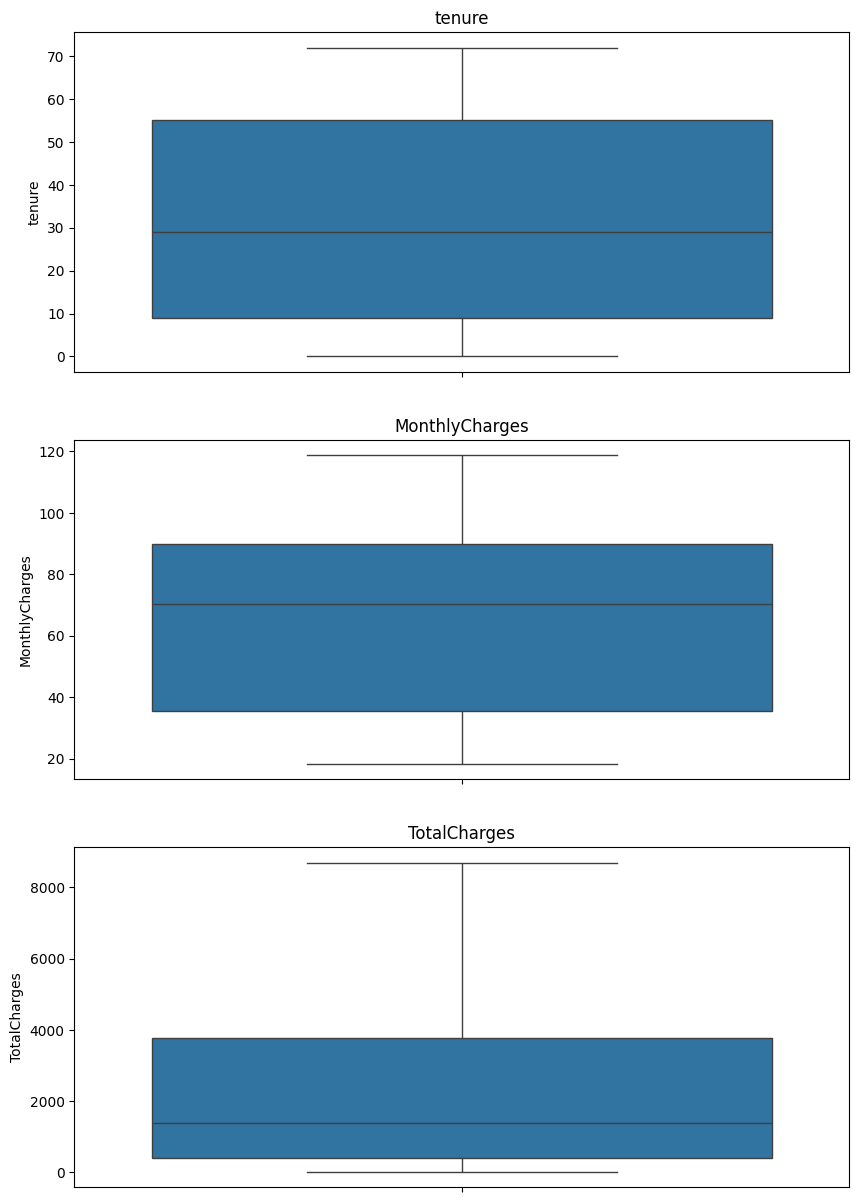

In [71]:
fig,axes=plt.subplots(3,figsize=(10,15))
selected_columns=['tenure','MonthlyCharges','TotalCharges']

for row_num,col in enumerate(selected_columns):
  axes[row_num].set_title(col)
  sns.boxplot(data[col],ax=axes[row_num])
  

HEATMAP

In [72]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: >

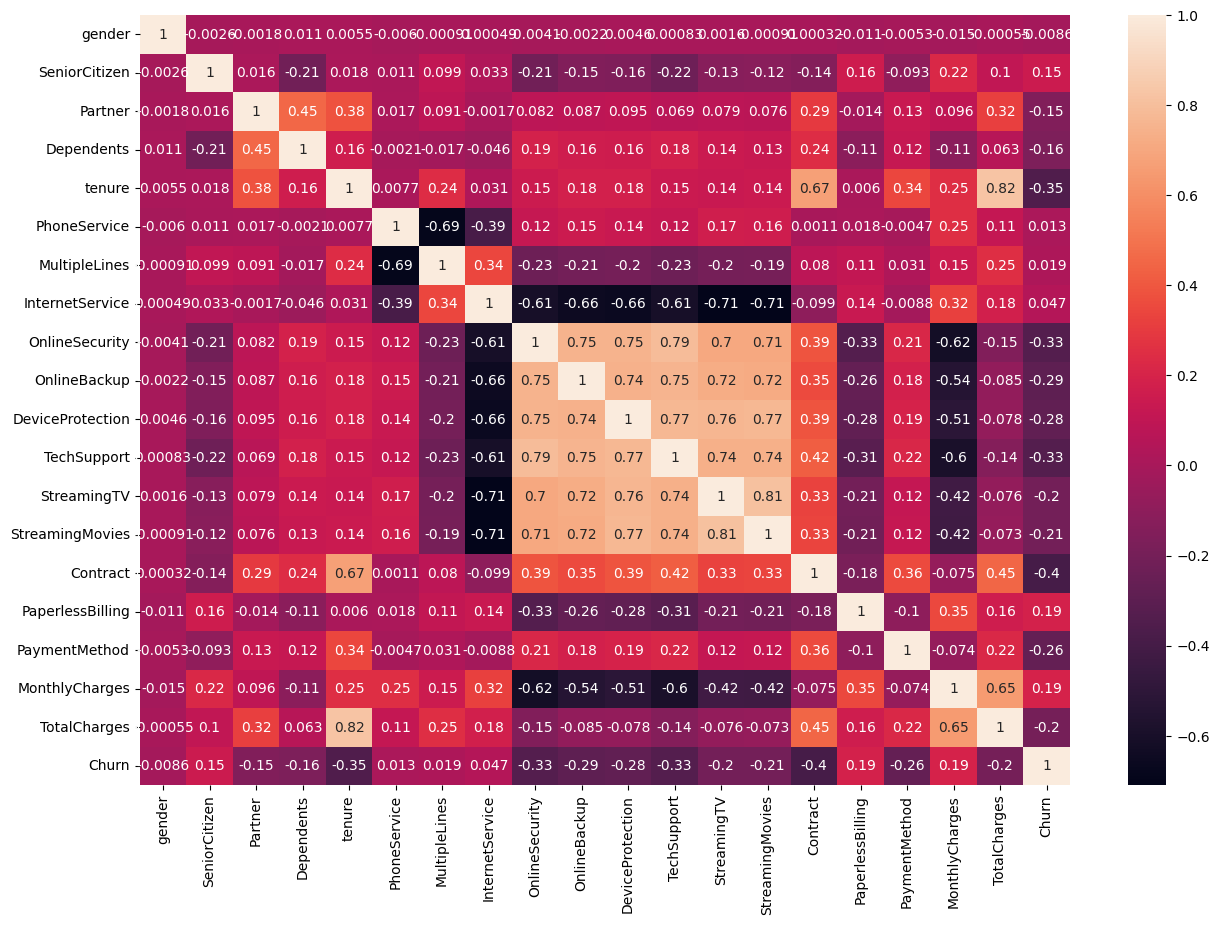

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

<h2>
INFERNCES FROM HEATMAP
</h2>
<p>
Columns like <b>'tenure' , 'OnlineSecurity' ,'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','Contract','PaymentMethod'
</b> are mostly correlated with <b>'Churn'</b>
<p>
<br>
<b>* 'Contract'</b> has a negative correlation of -0.4 with <b>'Churn'</b> as it shows as the contract decreases there is more chance of churn
</p>

<p>
* Columns <b>'tenure' , 'OnlineSecurity' ,'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies','PaymentMethod'
</b> are also shown a negative correaltion with <b>'Churn'</b>
</p>

<p>
* Column <b>'gender' </b>has least correaltion with <b>'Churn'</b>
</p>

<p>
* Columns <b> 'PhoneService', 'MultipleLines' </b>has least correaltion with <b>'Churn'</b> and are also highly -ve correlated wiith each other
</p>

<h4>SPLITTING DATA</h4>

In [74]:
data.shape

(7043, 20)

In [75]:
X=data.drop('Churn',axis=1)
y=data['Churn']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<h4>TRAINING AND TESTING MODEL</h4>

In [77]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

LOGISTIC REGRESSION

In [78]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
log_y_pred=lr_model.predict(X_test)

print(confusion_matrix(y_test,log_y_pred))
print(classification_report(y_test,log_y_pred))

[[1166  116]
 [ 207  272]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1282
           1       0.70      0.57      0.63       479

    accuracy                           0.82      1761
   macro avg       0.78      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761



f:\EDU CODING\PYTHON STP\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM

In [79]:
from sklearn.svm import SVC

svc_model=SVC()
svc_model.fit(X_train,y_train)
svc_y_pred=svc_model.predict(X_test)

print(confusion_matrix(y_test,svc_y_pred))
print(classification_report(y_test,svc_y_pred))

[[1282    0]
 [ 479    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1282
           1       0.00      0.00      0.00       479

    accuracy                           0.73      1761
   macro avg       0.36      0.50      0.42      1761
weighted avg       0.53      0.73      0.61      1761



f:\EDU CODING\PYTHON STP\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\EDU CODING\PYTHON STP\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\EDU CODING\PYTHON STP\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

acc_list=[]
for i in range(1,15):
  sample_model_knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  sample_model_knn.fit(X_train,y_train)
  sample_y_pred=sample_model_knn.predict(X_test)
  acc_list.append(accuracy_score(y_test,sample_y_pred))

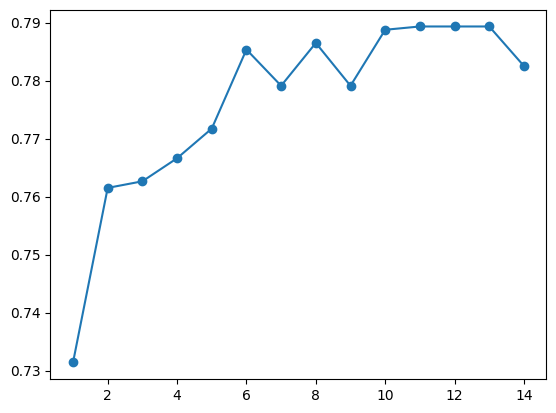

In [81]:
plt.plot(np.arange(1,15),acc_list,'-o')
plt.show()

In [82]:
knn_model=KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train,y_train)
knn_y_pred=knn_model.predict(X_test)

print(confusion_matrix(y_test,knn_y_pred))
print(classification_report(y_test,knn_y_pred))


[[1202   80]
 [ 298  181]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1282
           1       0.69      0.38      0.49       479

    accuracy                           0.79      1761
   macro avg       0.75      0.66      0.68      1761
weighted avg       0.77      0.79      0.76      1761



DECISION TREE

In [83]:
from sklearn.tree import DecisionTreeClassifier

dtc_model=DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train,y_train)
dtc_y_pred=dtc_model.predict(X_test)

print(confusion_matrix(y_test,dtc_y_pred))
print(classification_report(y_test,dtc_y_pred))

[[1053  229]
 [ 255  224]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1282
           1       0.49      0.47      0.48       479

    accuracy                           0.73      1761
   macro avg       0.65      0.64      0.65      1761
weighted avg       0.72      0.73      0.72      1761



RANDOM FOREST ALGORITHM

In [84]:
from sklearn.ensemble import RandomForestClassifier

rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
rfc_y_pred=rfc_model.predict(X_test)

print(confusion_matrix(y_test,rfc_y_pred))
print(classification_report(y_test,rfc_y_pred))

[[1171  111]
 [ 261  218]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1282
           1       0.66      0.46      0.54       479

    accuracy                           0.79      1761
   macro avg       0.74      0.68      0.70      1761
weighted avg       0.78      0.79      0.77      1761



In [85]:
accuracy_df=pd.DataFrame({'Model':['LogisticRegression','SVM','KNN','DecisionTreeClassifier','RandomForestClassifier'],
                          'Accuracy Score':[accuracy_score(y_test,log_y_pred),accuracy_score(y_test,svc_y_pred),accuracy_score(y_test,knn_y_pred),accuracy_score(y_test,dtc_y_pred),accuracy_score(y_test,rfc_y_pred)]})
accuracy_df

,Model,Accuracy Score
0,LogisticRegression,0.816581
1,SVM,0.727995
2,KNN,0.785349
3,DecisionTreeClassifier,0.725156
4,RandomForestClassifier,0.788756


<b>LogisticRegression has the best accuracy</b>